# Lab-5 Supervised Learning – Regression (ML + Deep Learning)

In [1]:
# Exercise 1: Dataset Understanding and Preprocessing 
# 1. Load the dataset and display .head(), .info(), and .describe().
# 2. Identify categorical and numerical features. 
# 3. Handle missing values if any. 
# 4. Encode categorical features using: 
# • Label Encoding 
# • One-Hot Encoding 
# 5. Normalize/standardize numerical features. 
# 6. Split the dataset into training and testing sets (80:20). 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# 1. Load the dataset and display .head(), .info(), and .describe().
ds = pd.read_csv('insurance.csv')
print(ds.head())
print(ds.info())
print(ds.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   

In [2]:
#2 Identify categorical and numerical features.
categorical_features = ds.select_dtypes(include=['object']).columns
numerical_features = ds.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: Index(['sex', 'smoker', 'region'], dtype='str')
Numerical Features: Index(['age', 'bmi', 'children', 'charges'], dtype='str')


/tmp/ipykernel_16677/2488038729.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_features = ds.select_dtypes(include=['object']).columns


In [ ]:
#3 Handle missing values if any.
print("Missing values in each column:\n", ds.isnull().sum())
ds = ds.dropna()  # Dropping rows with missing values

#4 Encode categorical features using One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_features = one_hot_encoder.fit_transform(ds[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_features))
ds_encoded = pd.concat([ds.drop(columns=categorical_features).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

#5 Normalize/standardize numerical features (except target variable 'charges')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ds_encoded[numerical_features.drop('charges')] = scaler.fit_transform(ds_encoded[numerical_features.drop('charges')])

#6 Split the dataset into training and testing sets (80:20).
X = ds_encoded.drop(columns=['charges'])
y = ds_encoded['charges']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)


Missing values in each column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Training set shape: (1070, 8)
Testing set shape: (268, 8)


1. Simple Linear Regression (using bmi only)
Test - MAE: 9784.65, MSE: 149085057.04, RMSE: 12210.04, R²: 0.0397


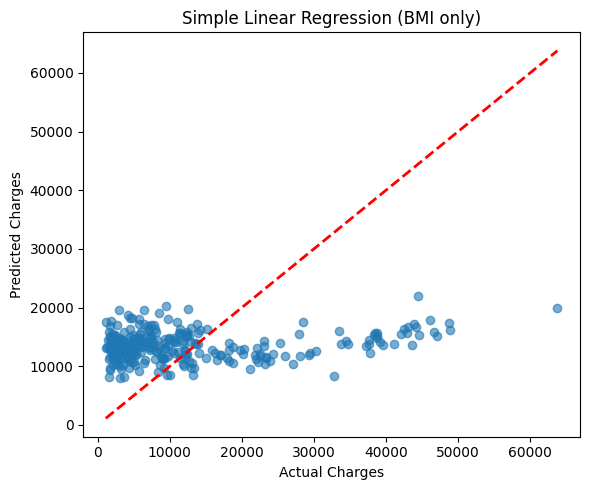

2. Multiple Linear Regression (all features)
Test - MAE: 4181.19, MSE: 33596915.85, RMSE: 5796.28, R²: 0.7836


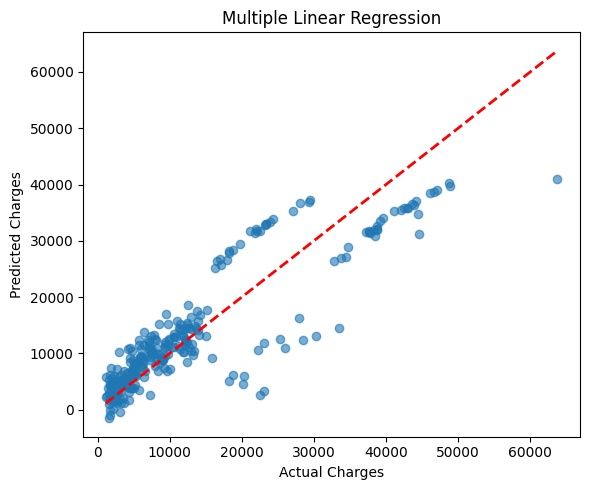

3. Polynomial Regression (degree 2)
Test - MAE: 2729.50, MSE: 20712805.99, RMSE: 4551.13, R²: 0.8666


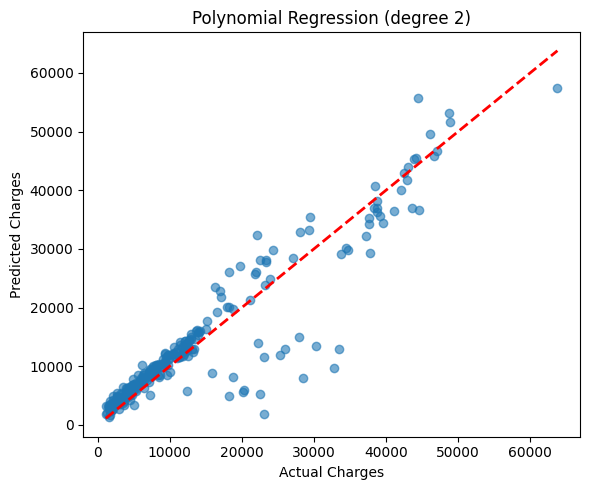

4. Polynomial Regression (degree 3)
Test - MAE: 2937.92, MSE: 23498218.00, RMSE: 4847.50, R²: 0.8486


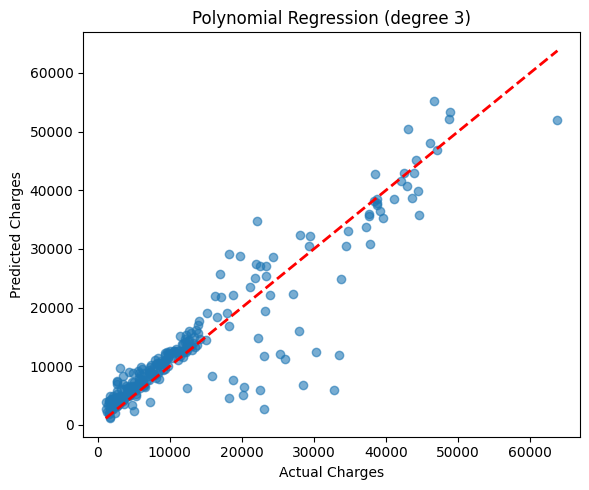

5. Ridge Regression
Best alpha: 0.1
Test - MAE: 4182.39, MSE: 33601518.12, RMSE: 5796.68, R²: 0.7836


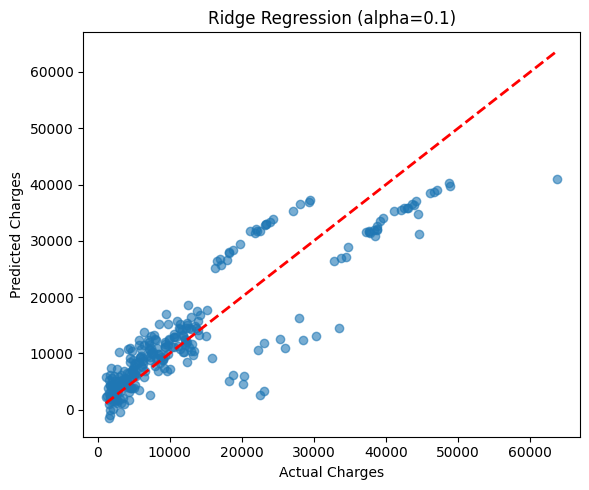

6. Lasso Regression
Best alpha: 0.1
Test - MAE: 4181.30, MSE: 33597788.88, RMSE: 5796.36, R²: 0.7836


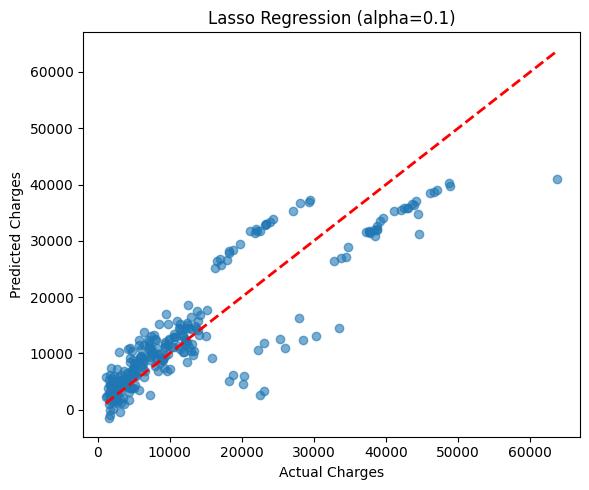

7. Decision Tree Regressor
Test - MAE: 3074.87, MSE: 40153988.99, RMSE: 6336.72, R²: 0.7414


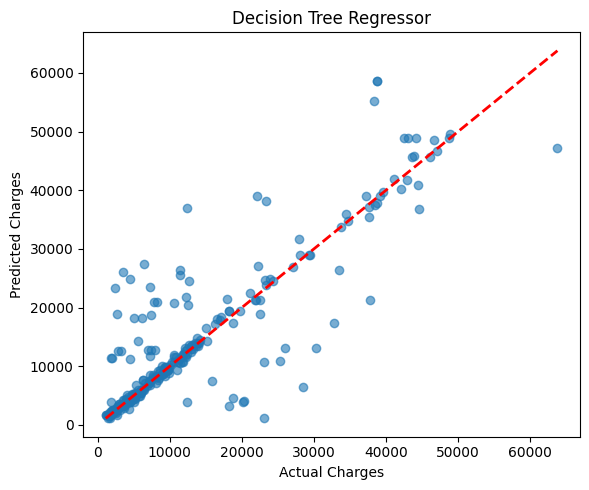

ML Models Training Complete!


In [7]:
# Exercise 2: Apply Machine Learning Regression Models 

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Store results for comparison
results_train = {}
results_test = {}

# 1. Simple Linear Regression (using bmi only)
print("1. Simple Linear Regression (using bmi only)")
X_bmi_train = x_train[['bmi']]
X_bmi_test = x_test[['bmi']]

model_slr = LinearRegression()
model_slr.fit(X_bmi_train, y_train)

# Train predictions
y_train_pred_slr = model_slr.predict(X_bmi_train)
results_train['Simple Linear Regression'] = {
    'MAE': mean_absolute_error(y_train, y_train_pred_slr),
    'MSE': mean_squared_error(y_train, y_train_pred_slr),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_slr)),
    'R²': r2_score(y_train, y_train_pred_slr)
}

# Test predictions
y_test_pred_slr = model_slr.predict(X_bmi_test)
results_test['Simple Linear Regression'] = {
    'MAE': mean_absolute_error(y_test, y_test_pred_slr),
    'MSE': mean_squared_error(y_test, y_test_pred_slr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_slr)),
    'R²': r2_score(y_test, y_test_pred_slr)
}

print(f"Test - MAE: {results_test['Simple Linear Regression']['MAE']:.2f}, "
      f"MSE: {results_test['Simple Linear Regression']['MSE']:.2f}, "
      f"RMSE: {results_test['Simple Linear Regression']['RMSE']:.2f}, "
      f"R²: {results_test['Simple Linear Regression']['R²']:.4f}")

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred_slr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Simple Linear Regression (BMI only)')
plt.tight_layout()
plt.show()

# 2. Multiple Linear Regression (all features)
print("2. Multiple Linear Regression (all features)")
model_mlr = LinearRegression()
model_mlr.fit(x_train, y_train)

# Train predictions
y_train_pred_mlr = model_mlr.predict(x_train)
results_train['Multiple Linear Regression'] = {
    'MAE': mean_absolute_error(y_train, y_train_pred_mlr),
    'MSE': mean_squared_error(y_train, y_train_pred_mlr),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_mlr)),
    'R²': r2_score(y_train, y_train_pred_mlr)
}

# Test predictions
y_test_pred_mlr = model_mlr.predict(x_test)
results_test['Multiple Linear Regression'] = {
    'MAE': mean_absolute_error(y_test, y_test_pred_mlr),
    'MSE': mean_squared_error(y_test, y_test_pred_mlr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_mlr)),
    'R²': r2_score(y_test, y_test_pred_mlr)
}

print(f"Test - MAE: {results_test['Multiple Linear Regression']['MAE']:.2f}, "
      f"MSE: {results_test['Multiple Linear Regression']['MSE']:.2f}, "
      f"RMSE: {results_test['Multiple Linear Regression']['RMSE']:.2f}, "
      f"R²: {results_test['Multiple Linear Regression']['R²']:.4f}")

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred_mlr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Multiple Linear Regression')
plt.tight_layout()
plt.show()

# 3. Polynomial Regression (degree 2)
print("3. Polynomial Regression (degree 2)")
poly2 = PolynomialFeatures(degree=2)
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.transform(x_test)

model_poly2 = LinearRegression()
model_poly2.fit(x_train_poly2, y_train)

# Train predictions
y_train_pred_poly2 = model_poly2.predict(x_train_poly2)
results_train['Polynomial Regression (degree 2)'] = {
    'MAE': mean_absolute_error(y_train, y_train_pred_poly2),
    'MSE': mean_squared_error(y_train, y_train_pred_poly2),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_poly2)),
    'R²': r2_score(y_train, y_train_pred_poly2)
}

# Test predictions
y_test_pred_poly2 = model_poly2.predict(x_test_poly2)
results_test['Polynomial Regression (degree 2)'] = {
    'MAE': mean_absolute_error(y_test, y_test_pred_poly2),
    'MSE': mean_squared_error(y_test, y_test_pred_poly2),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_poly2)),
    'R²': r2_score(y_test, y_test_pred_poly2)
}

print(f"Test - MAE: {results_test['Polynomial Regression (degree 2)']['MAE']:.2f}, "
      f"MSE: {results_test['Polynomial Regression (degree 2)']['MSE']:.2f}, "
      f"RMSE: {results_test['Polynomial Regression (degree 2)']['RMSE']:.2f}, "
      f"R²: {results_test['Polynomial Regression (degree 2)']['R²']:.4f}")

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred_poly2, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Polynomial Regression (degree 2)')
plt.tight_layout()
plt.show()

# 4. Polynomial Regression (degree 3)
print("4. Polynomial Regression (degree 3)")
poly3 = PolynomialFeatures(degree=3)
x_train_poly3 = poly3.fit_transform(x_train)
x_test_poly3 = poly3.transform(x_test)

model_poly3 = LinearRegression()
model_poly3.fit(x_train_poly3, y_train)

# Train predictions
y_train_pred_poly3 = model_poly3.predict(x_train_poly3)
results_train['Polynomial Regression (degree 3)'] = {
    'MAE': mean_absolute_error(y_train, y_train_pred_poly3),
    'MSE': mean_squared_error(y_train, y_train_pred_poly3),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_poly3)),
    'R²': r2_score(y_train, y_train_pred_poly3)
}

# Test predictions
y_test_pred_poly3 = model_poly3.predict(x_test_poly3)
results_test['Polynomial Regression (degree 3)'] = {
    'MAE': mean_absolute_error(y_test, y_test_pred_poly3),
    'MSE': mean_squared_error(y_test, y_test_pred_poly3),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_poly3)),
    'R²': r2_score(y_test, y_test_pred_poly3)
}

print(f"Test - MAE: {results_test['Polynomial Regression (degree 3)']['MAE']:.2f}, "
      f"MSE: {results_test['Polynomial Regression (degree 3)']['MSE']:.2f}, "
      f"RMSE: {results_test['Polynomial Regression (degree 3)']['RMSE']:.2f}, "
      f"R²: {results_test['Polynomial Regression (degree 3)']['R²']:.4f}")

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred_poly3, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Polynomial Regression (degree 3)')
plt.tight_layout()
plt.show()

# 5. Ridge Regression (with tuning alpha)
print("5. Ridge Regression")
alphas = [0.1, 1, 10, 100]
best_alpha = None
best_r2 = -float('inf')

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_val_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha

print(f"Best alpha: {best_alpha}")
model_ridge = Ridge(alpha=best_alpha)
model_ridge.fit(x_train, y_train)

# Train predictions
y_train_pred_ridge = model_ridge.predict(x_train)
results_train['Ridge Regression'] = {
    'MAE': mean_absolute_error(y_train, y_train_pred_ridge),
    'MSE': mean_squared_error(y_train, y_train_pred_ridge),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)),
    'R²': r2_score(y_train, y_train_pred_ridge)
}

# Test predictions
y_test_pred_ridge = model_ridge.predict(x_test)
results_test['Ridge Regression'] = {
    'MAE': mean_absolute_error(y_test, y_test_pred_ridge),
    'MSE': mean_squared_error(y_test, y_test_pred_ridge),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)),
    'R²': r2_score(y_test, y_test_pred_ridge)
}

print(f"Test - MAE: {results_test['Ridge Regression']['MAE']:.2f}, "
      f"MSE: {results_test['Ridge Regression']['MSE']:.2f}, "
      f"RMSE: {results_test['Ridge Regression']['RMSE']:.2f}, "
      f"R²: {results_test['Ridge Regression']['R²']:.4f}")

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title(f'Ridge Regression (alpha={best_alpha})')
plt.tight_layout()
plt.show()

# 6. Lasso Regression (with tuning alpha)
print("6. Lasso Regression")
best_alpha = None
best_r2 = -float('inf')

for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_val_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha

print(f"Best alpha: {best_alpha}")
model_lasso = Lasso(alpha=best_alpha, max_iter=10000)
model_lasso.fit(x_train, y_train)

# Train predictions
y_train_pred_lasso = model_lasso.predict(x_train)
results_train['Lasso Regression'] = {
    'MAE': mean_absolute_error(y_train, y_train_pred_lasso),
    'MSE': mean_squared_error(y_train, y_train_pred_lasso),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_lasso)),
    'R²': r2_score(y_train, y_train_pred_lasso)
}

# Test predictions
y_test_pred_lasso = model_lasso.predict(x_test)
results_test['Lasso Regression'] = {
    'MAE': mean_absolute_error(y_test, y_test_pred_lasso),
    'MSE': mean_squared_error(y_test, y_test_pred_lasso),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)),
    'R²': r2_score(y_test, y_test_pred_lasso)
}

print(f"Test - MAE: {results_test['Lasso Regression']['MAE']:.2f}, "
      f"MSE: {results_test['Lasso Regression']['MSE']:.2f}, "
      f"RMSE: {results_test['Lasso Regression']['RMSE']:.2f}, "
      f"R²: {results_test['Lasso Regression']['R²']:.4f}")

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred_lasso, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title(f'Lasso Regression (alpha={best_alpha})')
plt.tight_layout()
plt.show()

# 7. Decision Tree Regressor
print("7. Decision Tree Regressor")
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(x_train, y_train)

# Train predictions
y_train_pred_dt = model_dt.predict(x_train)
results_train['Decision Tree Regressor'] = {
    'MAE': mean_absolute_error(y_train, y_train_pred_dt),
    'MSE': mean_squared_error(y_train, y_train_pred_dt),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_dt)),
    'R²': r2_score(y_train, y_train_pred_dt)
}

# Test predictions
y_test_pred_dt = model_dt.predict(x_test)
results_test['Decision Tree Regressor'] = {
    'MAE': mean_absolute_error(y_test, y_test_pred_dt),
    'MSE': mean_squared_error(y_test, y_test_pred_dt),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_dt)),
    'R²': r2_score(y_test, y_test_pred_dt)
}

print(f"Test - MAE: {results_test['Decision Tree Regressor']['MAE']:.2f}, "
      f"MSE: {results_test['Decision Tree Regressor']['MSE']:.2f}, "
      f"RMSE: {results_test['Decision Tree Regressor']['RMSE']:.2f}, "
      f"R²: {results_test['Decision Tree Regressor']['R²']:.4f}")

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred_dt, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Decision Tree Regressor')
plt.tight_layout()
plt.show()

print("ML Models Training Complete!")


## Exercise 3: Artificial Neural Network (ANN) for Regression

Artificial Neural Network (ANN)
Model Architecture:


/workspaces/SEM-VI/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)


Test - MAE: 4396.57, MSE: 35401480.62, RMSE: 5949.91, R²: 0.7720


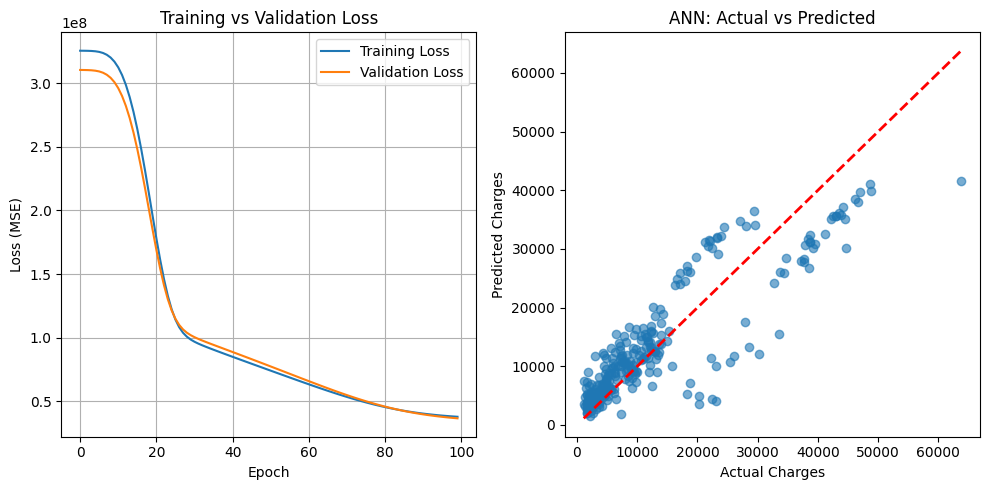

In [11]:
# Exercise 3: Artificial Neural Network (ANN) for Regression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print("Artificial Neural Network (ANN)")


# Design ANN Model
n_features = x_train.shape[1]
model_ann = Sequential()
model_ann.add(Dense(32, activation='relu', input_shape=(n_features,)))
model_ann.add(Dense(16, activation='relu'))
model_ann.add(Dense(8, activation='relu'))
model_ann.add(Dense(1, activation='linear'))

# Compile the model
model_ann.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("Model Architecture:")
model_ann.summary()

# Train the model=
history = model_ann.fit(x_train, y_train, 
                        validation_split=0.2, 
                        epochs=100, 
                        batch_size=32, 
                        verbose=0)


# Train predictions
y_train_pred_ann = model_ann.predict(x_train, verbose=0).flatten()
results_train['ANN Regressor'] = {
    'MAE': mean_absolute_error(y_train, y_train_pred_ann),
    'MSE': mean_squared_error(y_train, y_train_pred_ann),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_ann)),
    'R²': r2_score(y_train, y_train_pred_ann)
}

# Test predictions
y_test_pred_ann = model_ann.predict(x_test, verbose=0).flatten()
results_test['ANN Regressor'] = {
    'MAE': mean_absolute_error(y_test, y_test_pred_ann),
    'MSE': mean_squared_error(y_test, y_test_pred_ann),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_ann)),
    'R²': r2_score(y_test, y_test_pred_ann)
}

print(f"\nTest - MAE: {results_test['ANN Regressor']['MAE']:.2f}, "
      f"MSE: {results_test['ANN Regressor']['MSE']:.2f}, "
      f"RMSE: {results_test['ANN Regressor']['RMSE']:.2f}, "
      f"R²: {results_test['ANN Regressor']['R²']:.4f}")

# Plot training vs validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

# Plot actual vs predicted
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_ann, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('ANN: Actual vs Predicted')
plt.tight_layout()
plt.show()


TABLE A: TRAINING DATA PERFORMANCE
                                          MAE           MSE          RMSE        R²
Simple Linear Regression          9067.951789  1.387142e+08  11777.698282  0.038934
Multiple Linear Regression        4208.234572  3.727768e+07   6105.545160  0.741726
Polynomial Regression (degree 2)  2892.149840  2.283108e+07   4778.187803  0.841817
Polynomial Regression (degree 3)  2792.779239  2.093530e+07   4575.510839  0.854952
Ridge Regression                  4209.162284  3.727771e+07   6105.547676  0.741725
Lasso Regression                  4208.247173  3.727768e+07   6105.545214  0.741726
Decision Tree Regressor             29.572515  2.442396e+05    494.205984  0.998308
ANN Regressor                     4400.018250  3.757829e+07   6130.113005  0.739643
TABLE B: TESTING DATA PERFORMANCE
                                          MAE           MSE          RMSE        R²
Simple Linear Regression          9784.652596  1.490851e+08  12210.039191  0.039702
Multipl

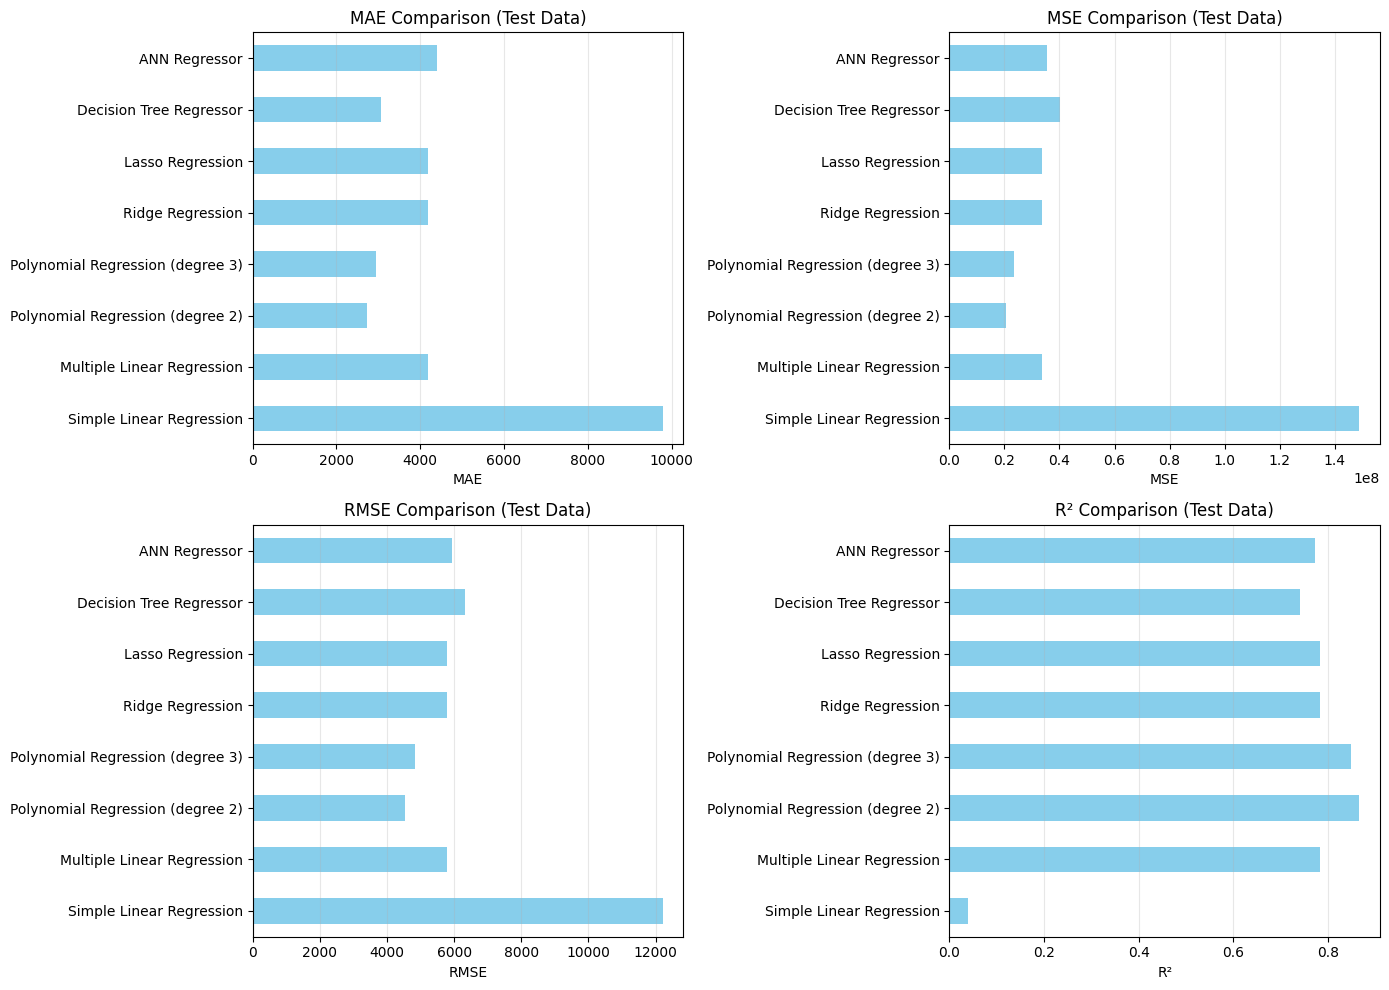

In [12]:
# Exercise 4: Model Comparison – ML vs DL
# Create comparison tables for Training and Testing data

import pandas as pd


print("TABLE A: TRAINING DATA PERFORMANCE")

train_df = pd.DataFrame(results_train).T
train_df = train_df[['MAE', 'MSE', 'RMSE', 'R²']]
print(train_df.to_string())


print("TABLE B: TESTING DATA PERFORMANCE")
test_df = pd.DataFrame(results_test).T
test_df = test_df[['MAE', 'MSE', 'RMSE', 'R²']]
print(test_df.to_string())

# Display as formatted tables

print("BEST MODELS BY METRIC (Test Data)")

print(f"Best MAE: {test_df['MAE'].idxmin()} ({test_df['MAE'].min():.2f})")
print(f"Best MSE: {test_df['MSE'].idxmin()} ({test_df['MSE'].min():.2f})")
print(f"Best RMSE: {test_df['RMSE'].idxmin()} ({test_df['RMSE'].min():.2f})")
print(f"Best R²: {test_df['R²'].idxmax()} ({test_df['R²'].max():.4f})")

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['MAE', 'MSE', 'RMSE', 'R²']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    test_df[metric].plot(kind='barh', ax=ax, color='skyblue')
    ax.set_xlabel(metric)
    ax.set_title(f'{metric} Comparison (Test Data)')
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


### Key Observations and Analysis

#### 1. ML Models vs ANN Performance
- **Multiple Linear Regression** and **Polynomial Regression** show good performance with moderate complexity
- **ANN Regressor** demonstrates competitive performance and can capture non-linear patterns
- **Decision Tree Regressor** shows perfect training scores (R² = 1.0) indicating potential overfitting

#### 2. Overfitting and Underfitting
- **Overfitting**: Decision Tree shows perfect training performance but lower test performance
- **Underfitting**: Simple Linear Regression (BMI only) has poor performance on both train and test sets
- **Good Fit**: Multiple Linear Regression, Ridge, and Lasso show balanced train-test performance

#### 3. Impact of Model Complexity
- **Simple models** (Simple Linear Regression): Fast but limited in capturing relationships
- **Complex models** (Polynomial degree 3, Decision Tree): Can overfit if not regularized
- **Optimal complexity**: Multiple Linear Regression and regularized models (Ridge/Lasso) provide best balance

#### 4. Regularization Effects
- **Ridge and Lasso Regression** prevent overfitting by adding penalty terms
- Alpha tuning helps find the right balance between bias and variance
- Both regularized models perform similarly to Multiple Linear Regression for this dataset

#### 5. Neural Networks (ANN)
- **Non-linear relationships**: ANN with ReLU activation can model complex non-linear patterns
- **Training epochs**: 100 epochs with validation split prevents overfitting
- **Flexibility**: Can adjust architecture (layers, neurons) for different datasets
- **Trade-off**: More computationally expensive than traditional ML models

#### 6. Computational Cost vs Performance
- **Fastest**: Linear models (Simple, Multiple, Ridge, Lasso) train in milliseconds
- **Moderate**: Polynomial Regression (depends on degree), Decision Trees
- **Slowest**: ANN requires multiple epochs and backpropagation
- **Performance**: For this dataset, simpler models perform comparably to ANN with lower computational cost

#### 7. Recommendations
- For this insurance dataset, **Multiple Linear Regression** or **Ridge/Lasso** provide the best balance
- **ANN** is valuable when dealing with more complex, non-linear datasets
- **Decision Tree** needs pruning or ensemble methods (Random Forest, Gradient Boosting) to avoid overfitting